## 事前準備
1. 処理したいテキストファイルをMyDrive下に置く
2. MyDrive下にfontフォルダを作成し、フォントのファイルを置く。（日本語を表示するために必要。）フォントのファイルが入ったfontフォルダを共有しているので、フォルダごとMyDriveにコピーしてください。

## 実行
データの取り込み部分で読み込むファイル名を処理したいファイルのものに変えて実行

In [ ]:
# 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

fatal: destination path 'mecab-ipadic-neologd' already exists and is not an empty directory.
ln: failed to create symbolic link '/usr/local/etc/mecabrc': File exists


In [ ]:
# ワードクラウド作成用ライブラリのインストール
!pip install -U wordcloud

In [ ]:
#ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#fontフォルダをコピー
!cp -a "/content/drive/MyDrive/font/" "/usr/share/fonts/"

In [ ]:
#データの取り込み。ファイルのパスや文字コードは処理ファイルに合わせてください。デモとしてkokoro.txtを使っています。
f = open('/content/drive/MyDrive/内服薬テキスト.txt')
text = f.read()  # ファイル終端まで全て読んだデータを返す
f.close()

In [ ]:
text

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#単語の分割 単語を原型にしてスペースで区切って連結。名詞・動詞・形容詞のみ
import MeCab
m = MeCab.Tagger ('-Ochasen')
 
word=""
#文書を単語にわける
node = m.parseToNode(text)
#各単語の処理
while node:
    #品詞を取得
    hinshi = node.feature.split(",")[0]
    #名詞・動詞・形容詞のみ処理
    if hinshi in ["名詞","動詞","形容詞"]:
        #単語の原型を取得
        origin = node.feature.split(",")[6]
        #除去するワードに該当しないか確認。除去したいワードを適宜[]の中に追加してください。
        if origin not in ["する","いる","ある","なる", "ため", "ない", "れる", "こと", "ところ", "おる", "*", "よう", "あり", "もの", "無し"]:
            word = word + " " + origin
    node = node.next

In [ ]:
word

' 状況 朝 内服 薬 夜 内服 事後 報告 受ける 重複 処方 内服 タイミング 違い 問い合わせ 問い合わせ 投薬 オーダー ２つ 監査 時 気づく 私 製剤 室 員 調剤 室 行く ２ 回 内服 医師 問い合わせる 確認 問い合わせ 病棟 上がる 確認 処方 医 片方 不要 中止 指示 対応 内服 日 前日 患者 内服 錠 錠 処方 重複 処方 監査 際 内容 確認 処方 事 確認 できる 払い出す しまう 心不全 加療 中 毎回 配 薬 患者 時 頃 昼 食後 薬 確認 配 薬 ケース 昼 食後 薬 入る 夕食 後 眠 薬 入る 夜勤 看護 師 確認 日 分 セット 時 昼 食後 薬 の 確認 ダブル チェック 行う 返答 有る 紛失 可能 性 高い 誤る 内服 可能 性 ゼロ 無い 主治医 判断 仰ぐ 結果 尿 量 少ない 有る 重複 構う 昼 食後 薬 飲む 指示 出る 胆 管 癌 術後 患者 患者 本人 経口 内服 できる 経 腸 投与 しまう 閉塞 しまう 医師 報告 経 腸 入れ替え 肺癌 中 数 日 前 糖尿 内科 転 科 転 棟 本来 中止 薬 指示 受ける 場合 患者 説明 中止 薬 病棟 保管 入院 時 中止 指示 中止 気づく 患者 説明 中止 薬 患者 手元 入院 の 病棟 指示 受け の 詳細 不明 神経 芽 腫 治療 後 検査 目的 入院 中 歳 女児 月 日 予定 時 過ぎ カルテ 確認 通常 検査 日 前 内服 はず ヨウ 化 カリウム 処方 発見 医師 報告 本日 日間 内服 術後 せん妄 夜間 見当 障害 みる られる 透析 患者 夕食 後 自分 持つ 持参 薬 自己 判断 飲む しまう 著 変 当番医 報告 経過 観察 指示 ヨウ 化 カリウム 内服 甲状腺 ブロック 施行 処方 失念 てる 緊急 入院 患者 様 入院 後 外出 行く 面談 出来る 持参 薬 提出 薬袋 記載 用法 用量 記載 中 １ 剤 用法 本来 夕食 後 誤る 朝食 後 入力 しまう 担当 掲示板 指摘 患者 面談 行う 担当 医 誤る 持参 薬 報告 お伝え 食道 癌 術後 患者 看護 師 毎回 配 薬 薬 管理 夜勤 看護 師 薬 セット 時 錠 残 数 該当 患者 内服 ボックス しまう 今朝 夜勤 看護 師 自己 管理 変更 ボックス 内 確

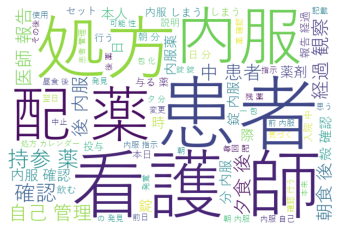

In [ ]:
#ワードクラウドの作成
from wordcloud import WordCloud
from matplotlib import pyplot as plt
#fontのパスの指定
fpath = "/usr/share/fonts/YUGOTHR.TTC"
#ワードクラウドの作成
wordcloud = WordCloud(background_color="white",font_path=fpath,width=600,height=400,min_font_size=15)
wordcloud.generate(word)
#ワードクラウドの表示
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


デフォルトだと「持参 薬」などの連続してよく出てくる組み合わせが「内服」および「確認」単体と別単語として両方表示されるようです。単体だけにしたい場合下記のように`collocations=False`でなくなるようです。

他にも単語の最低文字数の設定も可能です。一文字だと「後」、「分」などの意味ないものが多いので,`min_word_length=2`で二文字以上としてみました。

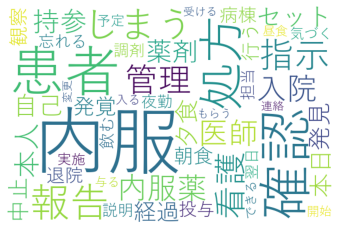

In [ ]:
wordcloud2 = WordCloud(background_color="white",
                       font_path=fpath,
                       width=600,#画像の縦の長さ
                       height=400,#画像の横の長さ
                       min_font_size=15,#一番小さい文字サイズ　大きくすると余白も増える
                       collocations=False,#単語の組み合わせを表示するか
                       min_word_length=2)#最低文字数
wordcloud2.generate(word)
#ワードクラウドの表示
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [ ]:
#保存
wordcloud2.to_file("/content/drive/MyDrive/wordcloud2.png")

## 単語の出現回数のカウント・グラフ化

実際にどの単語が何回出てきたかカウント
2単語の組み合わせについても調査

In [ ]:
#nlplotというライブラリを使用
!pip install nlplot

     |████████████████████████████████| 967 kB 5.3 MB/s 
     |████████████████████████████████| 23.9 MB 12 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import nlplot

In [ ]:
#単語リストをpandasのデータフレーム型に変換
df = pd.DataFrame({'words':word}, index=[0])
df

,words
0,状況 朝 内服 薬 夜 内服 事後 報告 受ける 重複 処方 内服 タイミング 違い 問い...


In [ ]:
#単語の出現回数を多い順にグラフ化

npt = nlplot.NLPlot(df, target_col='words')

npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
)

100%|██████████| 1/1 [00:00<00:00, 24.05it/s]


In [ ]:
#連続する2単語の組み合わせで多いものを表示
npt.bar_ngram(
    title='2-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50
)

100%|██████████| 1/1 [00:00<00:00, 17.86it/s]
